# Intelligent systems for bioinformatics- Group 1

This work is developed in the ambit of curricular unit intelligent systems for bioinformatics of the Bioinformatic Master by:
- [Beatriz Santos](https://github.com/beatrizsantos1607) (pg46723)
- [Duarte Velho](https://github.com/duartebred) (pg53481)
- [Ricardo Oliveira](https://github.com/ricardofoliveira61) (pg53501)
- [Rita Nóbrega](https://github.com/ritanobrega00) (pg46733)
- [Rodrigo Esperança](https://github.com/esperancaa) (pg50923)

This work consists in the analysis of a dataset through the utilization of machine learning algorithms, recurring to Python as the programming language.
The entire analysis is present on a Jupyter Notebook, organized in sections (explained later on) containing succinct explanations of the procedures and decisions taken throughout the analysis.

For this work we selected the [GDSC1](https://tdcommons.ai/multi_pred_tasks/drugres) dataset. This dataset contains the wet lab IC50 for 208 drugs in 1000 cancer cells lines and can be used to design models that can predict drug response since the same compound can have different levels of responses in different patients. With this we aim to design a model that given a pair of drug and cell line genomics profile can predict the drug response and find the best drug to treat certain patient. In this dataset the RMD normalized gene expression was used for cancer lines and the SMILES for drugs. Y is the log normalized IC50.

## Notebook sections
### 1. Preprocessing and data exploration
- Review of all documentation available about the dataset
- Load the dataset and realize an exploratory analysis 
- Prepare the dataset with the generation and selection of features and treatment of the missing values 

This stage corresponds to the 1st section of the Notebook where:
- The dataset must the described according to the documentation
- Summarize the characteristics of the data through an exploratory analysis
- Description of the preprocessing steps justifying the choices
- Include graphics that represent the main characteristics of the dataset

### 2. Non-supervised learning
- Utilization of the adequate visualization and dimensionality reduction technique
-  Application of clustering methods

This stage corresponds to the section 2 of the Notebook where:
- The results must be analyzed and the procedures explain

### 3. Machine Learning
- Compare the behavior of different models/methods of machine learning through the calculation of the performance metrics
- Present the best model for the dataset

This stage correspond to the section 3 of the notebook and all the results must be reported and analyzed in a critical way

### 4. Deep Leaning
- Utilization of deep learning methods similarly to the stage 3

This stage correspond to the section 4 of the notebook and must report the results and have a critical analysis.

All the packages used during this work are listed on the cell below


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler
import umap
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

/opt/anaconda3/envs/sib_tb/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
filtered_GDSC = pd.read_pickle(filepath_or_buffer="data/filtered_GDSC.pkl")

In [3]:
filtered_GDSC

,Drug_ID,Cell_ID,SMILES,morgan_fingerprints,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,...,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_unbrch_alkane,Gene_expression,Tissue,Y
0,Erlotinib,ES5,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.233101127037282, 10.0158835253502, 4.749714...",bone,3.968757
1,Erlotinib,ES7,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.33346622426757, 9.7939906169803, 3.97692286...",bone,2.692768
2,Erlotinib,EW-11,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[8.39134072442845, 10.260679561053099, 4.29587...",bone,2.478678
3,Erlotinib,SK-ES-1,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[7.87618818572121, 9.28592458211661, 4.4565194...",bone,2.034050
4,Erlotinib,COLO-829,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",5.857397,5.857397,0.392174,10.517241,393.443,370.259,...,0,0,0,0,0,0,0,"[7.174121760472291, 10.2214997646982, 4.047435...",skin,2.966952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167353,PFI-3,KMS-11,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[3.2931757120088303, 10.303324171865698, 4.476...",blood,3.940836
167354,PFI-3,SNU-407,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[8.57966425274312, 9.768011374915211, 5.713156...",digestive_system,4.820567
167355,PFI-3,SNU-61,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[8.077115751588071, 10.0380546663679, 5.205410...",digestive_system,5.785978
167356,PFI-3,SNU-81,O=C(C=CN1CC2CC1CN2c1ccccn1)c1ccccc1O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.220360,12.220360,-0.169023,22.500000,321.380,302.228,...,1,1,0,1,0,1,0,"[7.7976988637889, 9.46340006852192, 4.03969706...",digestive_system,5.393454


In [4]:
# Randomly sample rows
random_sampled_data = filtered_GDSC.sample(n=25000, random_state=42)  # Set n=25000 and random_state for reproducibility


tissue = random_sampled_data['Tissue']
gene_exp = random_sampled_data['Gene_expression']
morgan_fingerprints = random_sampled_data['morgan_fingerprints']

# Create the filtered dataset with the sampled rows
dataset_filtrado = random_sampled_data


# 2. Non-supervised learning

To gain a deeper understanding of the relationships within our data, unsupervised analysis will be performed. This analysis will provide valuable insights into the underlying structure of the data and potentially reveal important relationships between genomic profiles, drug properties, and drug responses. These informations will help in the development of a supervised model for predicting drug responses based on cell line genomics and drug properties. The patterns and structures revealed through unsupervised learning may guide feature selection, model architecture decisions, and provide context for interpreting the results of our predictive model.

The unsupervised analysis will focus on two main tasks: dimensionality reduction and clustering.


## 2.1 Dimensionality reduction

Dimensionality reduction methods are used to reduce the complexicity of complex data while retaining meaningful information, helping in the identification of the most important features that explain the variance in our data, and creating lower-dimensional representations that can be more easily visualized and analyzed.

Dimensionality reduction techniques, such as PCA, UMAP and t-SNE, will be applied to both the gene expression data and the SMILES representations of the drugs.

### 2.1.1 Principal Component Analysis (PCA)

Given our type of data, the Principal Component Analysis (PCA) would be appropriate for the reduction of dimensionality.
PCA is widely used for dimensionality reduction, especially when dealing with high-dimensional data like gene expression profiles. By reducing the dimensionality of the gene expression data, PCA can help identify the most important features that explain variance in the data, which can be useful to identify patterns or clusters within the cancer cell lines, and possibly visualize the relationship between cell lines and drug responses.

As the PCA is sensitive to the scale of the data, the first step was to standardize the gene expression data using the `StandardScaler().fit_transform()`.

In [5]:
gene_expression = np.array(gene_exp)
gene_expression = np.stack(gene_expression)
print("Gene expression original shape:",gene_expression.shape)

Gene expression original shape: (25000, 13349)


In [6]:
gene_expressions_scaled = StandardScaler().fit_transform(gene_expression)

To start the analysis, the data was reduced to 2 components for easier visualization and primary inspection of the results for better understanding of the clusters between the samples.

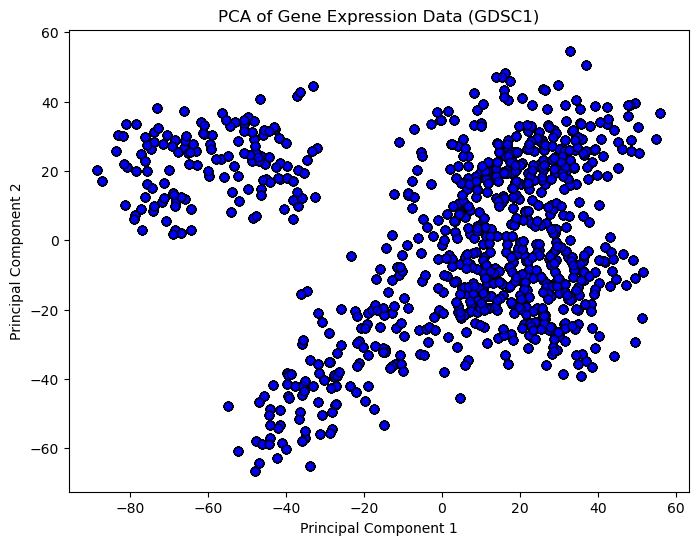

In [24]:
# Dimensionality reduction for gene expression
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gene_expressions_scaled)

# Visualization of PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA of Gene Expression Data (GDSC1)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Upon the analysis of the first PCA with 2 components, it's percetible that 2 is not the optimal number os compnents to explain the variance of the gene expression data. Therefore, to keep enough components to explain most of the variance, but not too many that turn the data redundant, we decided to assess the Explained Variance Plot and Cumulative Explained Variance. These are common methods for the determination of the optimal number of components.

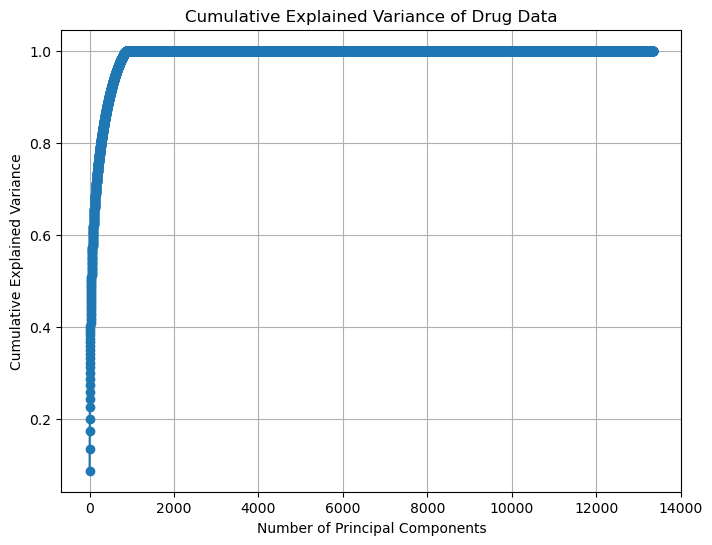

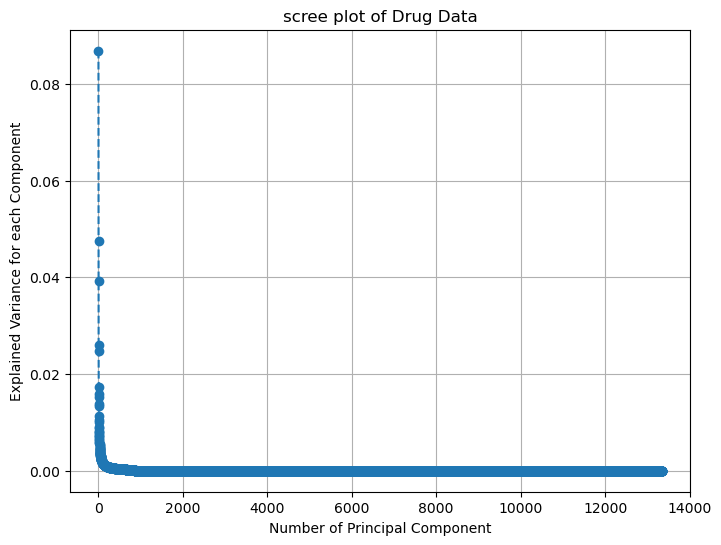

In [25]:
pca2 = PCA()
pca_results = pca2.fit(gene_expressions_scaled)
explained_variance = pca_results.explained_variance_ratio_
cumulative_variance_drugs = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_drugs, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance of Drug Data")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("scree plot of Drug Data")
plt.xlabel("Number of Principal Component")
plt.ylabel("Explained Variance for each Component")
plt.grid(True)
plt.show()

In [27]:
cumulative_variance = np.cumsum(pca2.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance > 0.90) + 1 
print("Number of components to explain 90% of the variance:",n_components)

Number of components to explain 90% of the variance: 469


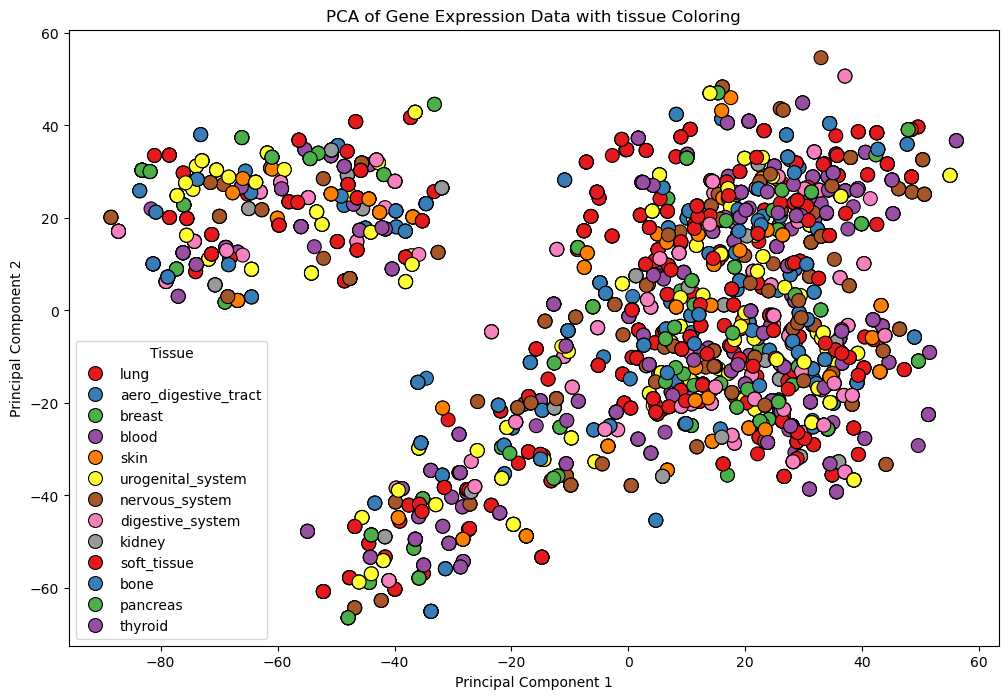

In [28]:
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df["Tissue"] = tissue

# Plot the PCA with tissue values as the color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Tissue", palette='Set1', s=100, edgecolor='black')
plt.title("PCA of Gene Expression Data with tissue Coloring")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Tissue')
plt.show()

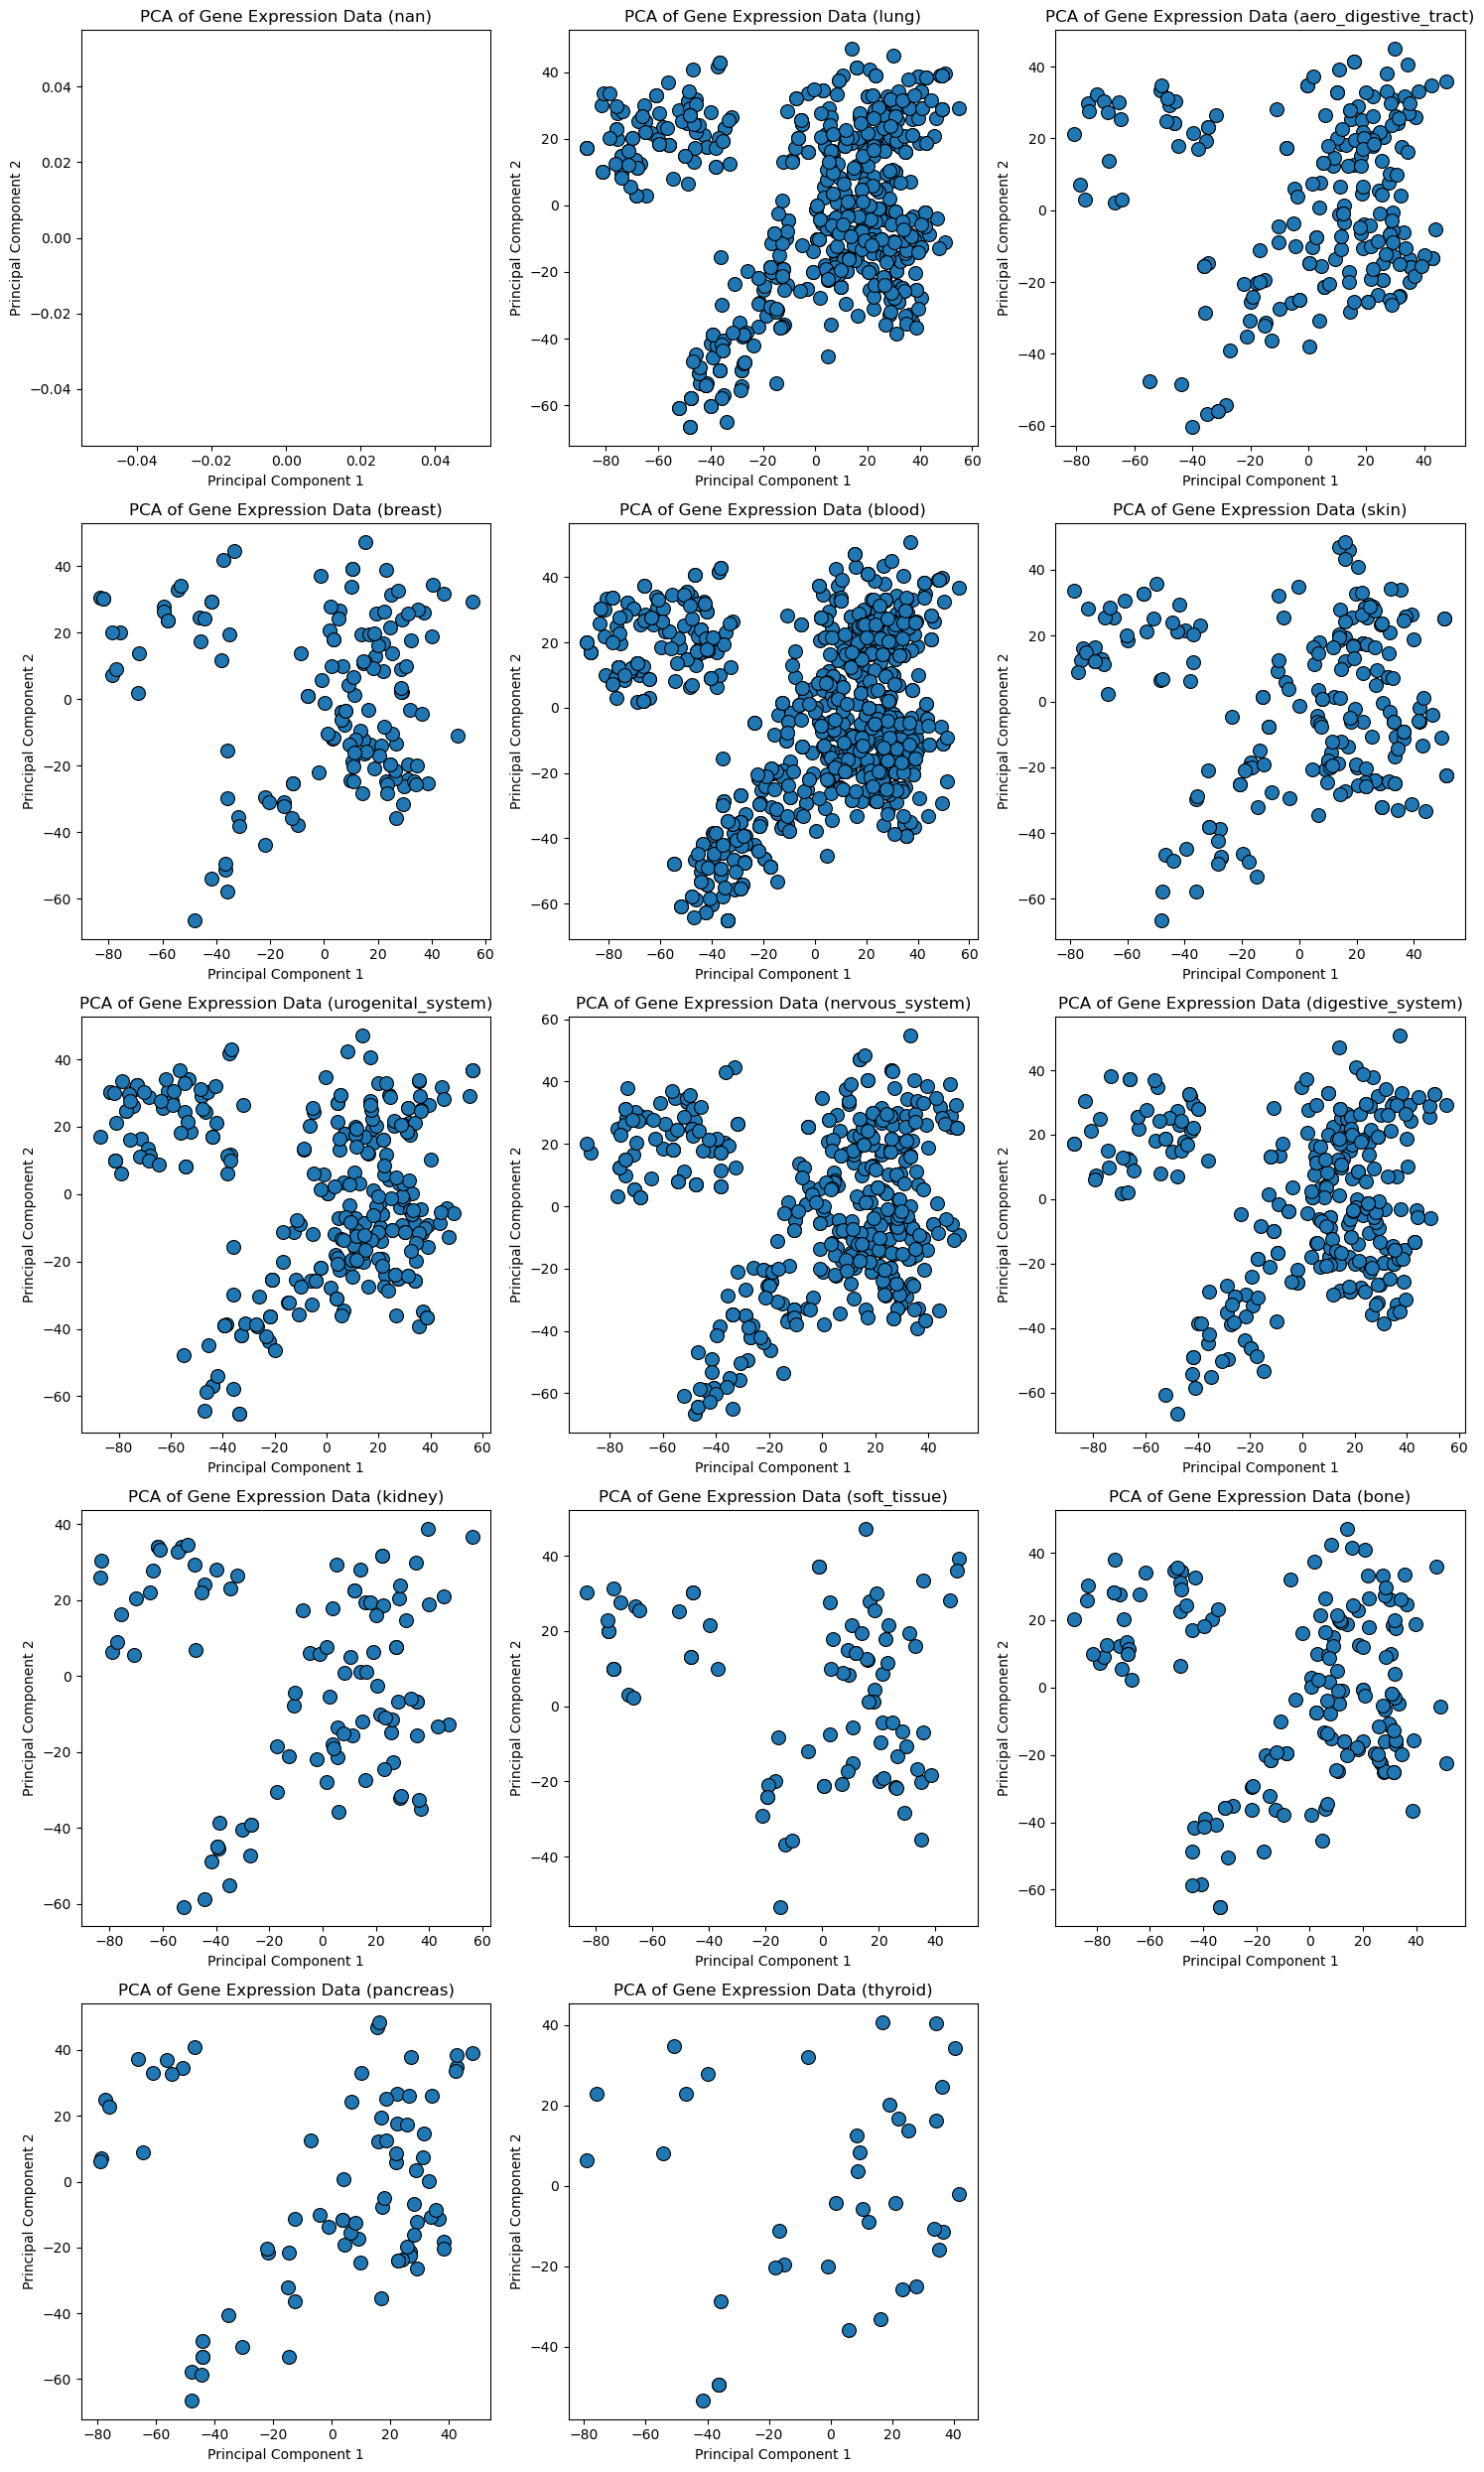

In [29]:
unique_tissues = pca_df["Tissue"].unique()
ncols=3
nrows = int(np.ceil(len(unique_tissues)/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, nrows*5))
axes = axes.flatten()

for i, tissue in enumerate(unique_tissues):
    tissue_df = pca_df[pca_df["Tissue"] == tissue]
    sns.scatterplot(data=tissue_df, x="PC1", y="PC2", s=100, edgecolor='black', ax=axes[i])
    axes[i].set_title(f"PCA of Gene Expression Data ({tissue})")
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
for i in range(len(unique_tissues), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

The methods for the assessment of the optimal number of components indicate that the best number of components to explain the variance of our data is ...

As the PCA requires a numerical input, the molecular fingerprints previously determined will be used. 

In [7]:
fingerprints = np.stack(morgan_fingerprints)
fingerprints_scaled = StandardScaler().fit_transform(fingerprints)

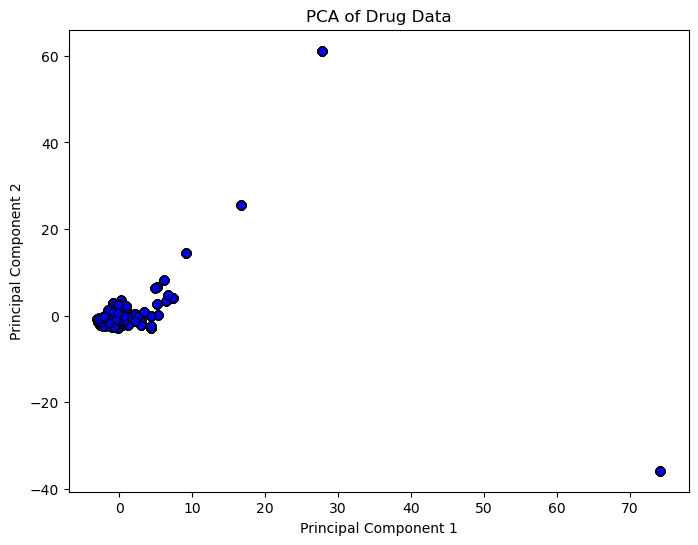

In [31]:
pca_drug = PCA(n_components=2)  # Reducing to 2 components for easier visualization
fingerprints_pca = pca_drug.fit_transform(fingerprints_scaled)

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_pca[:, 0], fingerprints_pca[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title("PCA of Drug Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

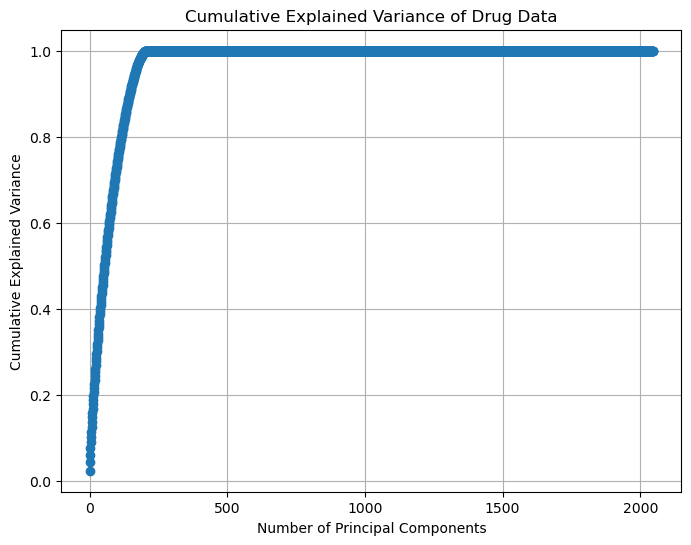

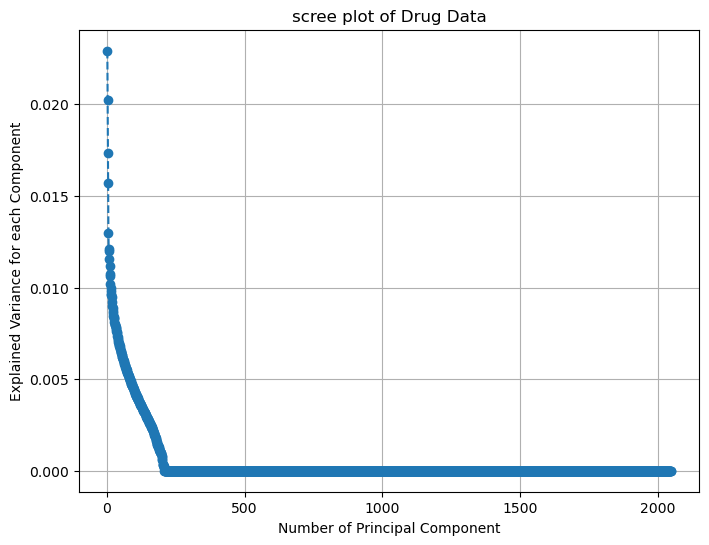

In [32]:
pca_drugs = PCA()
pca_drugs.fit(fingerprints_scaled)
explained_variance = pca_drugs.explained_variance_ratio_
cumulative_variance_drugs = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_drugs, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance of Drug Data")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("scree plot of Drug Data")
plt.xlabel("Number of Principal Component")
plt.ylabel("Explained Variance for each Component")
plt.grid(True)
plt.show()

In [33]:
n_components_drugs = np.argmax(cumulative_variance_drugs > 0.90) + 1 
print("Number of components to explain 90% of the variance:",n_components_drugs)

Number of components to explain 90% of the variance: 147


interpretação ...

### 2.1.2 t-SNE 

Another dimensionality reduction technique, similar to PCA, but particularly effective for visualizing high-dimensional data in 2D or 3D, is the t-SNE. As the PCA is linear technique, it may be helpful in the identification of potential non-linear relationships between gene expression and drug responses, and, consequentely, uncover hidden patterns within the data, we decided to also perform this technique.

As the t-SNE is also sensible to the scale of the data, the already standardized drugs and gene expression data were used.

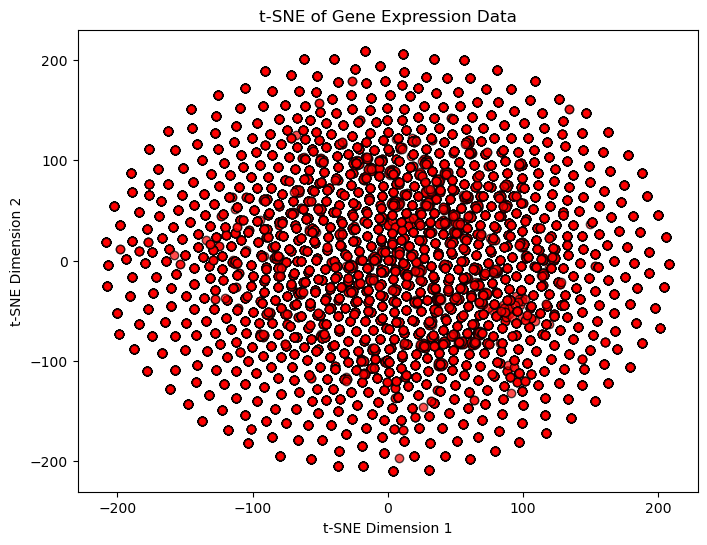

In [22]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(gene_expressions_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red', edgecolor='k', alpha=0.7)
plt.title("t-SNE of Gene Expression Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

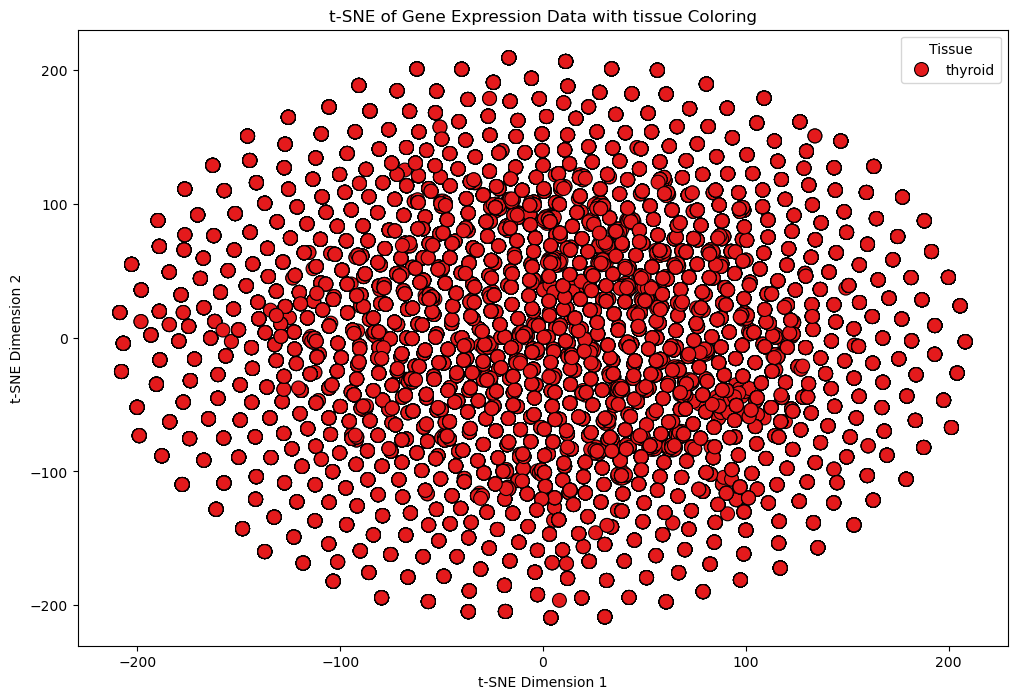

In [35]:
tsne_df = pd.DataFrame(data=X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["Tissue"] = tissue

# Plot the PCA with tissue values as the color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x="tSNE1", y="tSNE2", hue="Tissue", palette='Set1', s=100, edgecolor='black')
plt.title("t-SNE of Gene Expression Data with tissue Coloring")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='Tissue')
plt.show()

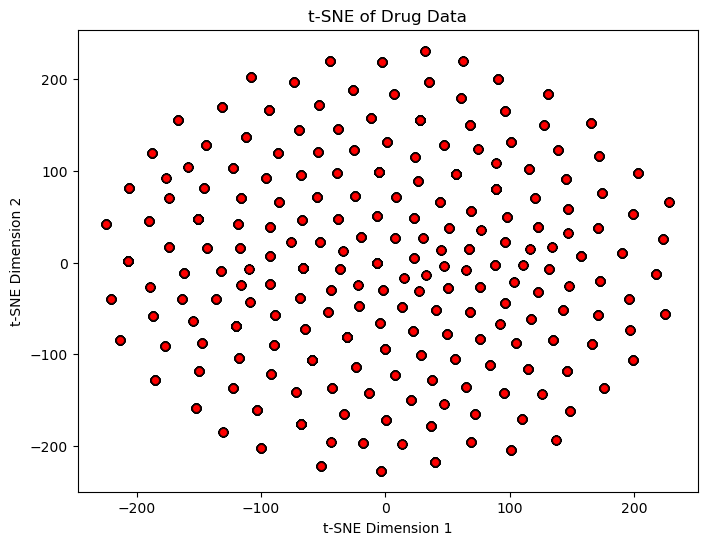

In [36]:
tsne = TSNE(n_components=2, random_state=42)
fingerprints_tsne = tsne.fit_transform(fingerprints_scaled)

# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_tsne[:, 0], fingerprints_tsne[:, 1], c='red', edgecolor='k', alpha=0.7)
plt.title("t-SNE of Drug Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### 2.1.3 Autoencoders (Unsupervised Neural Networks)

Autoencoders are neural networks used for unsupervised learning that can learn a compact representation of the input data. They are useful for dimensionality reduction and can help capture complex, non-linear relationships between genes and drug responses. 

Due to the fact that Autoencoders have been shown to be able to reveal hidden patterns in the data, capturing important features that are not immediately apparent and that can then be used as input features for the drug response prediction model, we decided to also apply this method to the standardizied gene expression data and morgan fingerprints separately.

In [37]:
#Creation of an autoencoder to reduce dimensionality and visualize the gene expression data
input_layer = Input(shape=(gene_expressions_scaled.shape[1],))  # Input layer
encoded = Dense(128, activation='relu')(input_layer)  # Compression layer
decoded = Dense(filtered_genes.shape[1], activation='sigmoid')(encoded)  # Reconstruction layer

# Definition the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compilation of the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Training the autoencoder
autoencoder.fit(gene_expressions_scaled, gene_expressions_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(gene_expressions_scaled, gene_expressions_scaled))

# Compression of teh data
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(gene_expressions_scaled)

# Plot of the compressed data from the autoencoder
plt.figure(figsize=(8, 6))
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c='green', edgecolor='k', alpha=0.7)
plt.title("Autoencoder Compressed Representation of Gene Expression Data")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

NameError: name 'Input' is not defined

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0819 - val_loss: 1.0551
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0551 - val_loss: 0.9779
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.9779 - val_loss: 0.8744
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.8744 - val_loss: 0.8351
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.8351 - val_loss: 0.8326
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.8326 - val_loss: 0.8325
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.8325 - val_loss: 0.8325
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.8325 - val_loss:

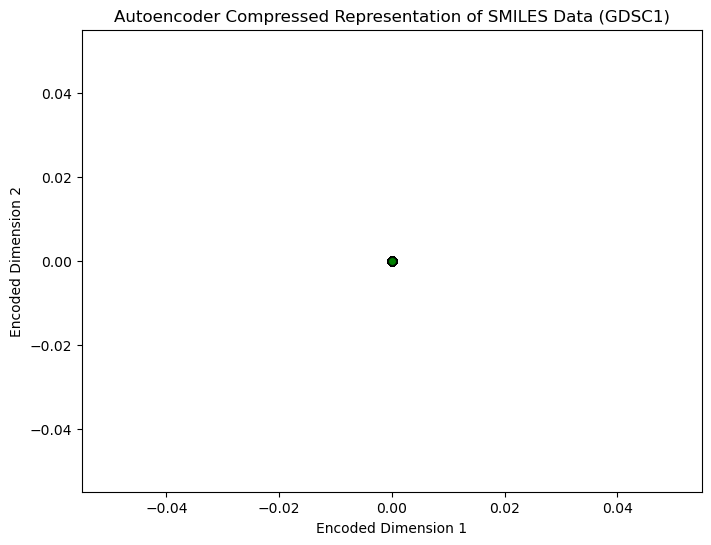

In [102]:
#Creation of an autoencoder to reduce dimensionality and visualize the gene expression data
input_layer = Input(shape=(fingerprints_scaled.shape[1],))  # Number of features (2048)

# Define the encoder part (compression)
encoded = Dense(1024, activation='relu')(input_layer)  # First hidden layer
encoded = Dense(512, activation='relu')(encoded)  # Second hidden layer
encoded = Dense(128, activation='relu')(encoded)  # Third hidden layer

# Define the decoder part (reconstruction)
decoded = Dense(512, activation='relu')(encoded)  # First hidden layer
decoded = Dense(1024, activation='relu')(decoded)  # Second hidden layer
decoded = Dense(fingerprints_scaled.shape[1], activation='sigmoid')(decoded)  # Output layer (same as input)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Create the encoder model (for extracting compressed representation)
encoder = Model(input_layer, encoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 4: Train the Autoencoder
autoencoder.fit(fingerprints_scaled, fingerprints_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(fingerprints_scaled, fingerprints_scaled))

# Step 5: Get the compressed representation (encoded data)
encoded_fingerprints = encoder.predict(fingerprints_scaled)

# Step 6: Visualize the compressed representation
plt.figure(figsize=(8, 6))
plt.scatter(encoded_fingerprints[:, 0], encoded_fingerprints[:, 1], c='green', edgecolor='k', alpha=0.7)
plt.title("Autoencoder Compressed Representation of SMILES Data (GDSC1)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

## 2.2 Clustering Methods

Clustering methods are used to uncover hidden patterns or groupings in the data, which might indicate biological relevance, such as similar mechanisms of action among drugs or cellular responses. In this case, Clustering will be used to group similar cell lines and drugs based on their characteristics, allowing the identification of potential subgroups of cell lines that may respond similarly to drugs, of groups of drugs with similar effects across the range of cell lines, or potentially cancer subtypes or drug classes that were not previously apparent.

Based on the GDSC1 dataset characteristics, mainly on its high-dimensionality, clustering algorithms such as K-Means,  and Hierarchical Clustering are the most appropriate to be appiled to the gene expression and drug characteristics and drug response data. 


### 2.2.1 K-means clustering

K-means is a partitioning method that divides data into a specified number of clusters. It's computationally efficient, making it suitable for our large dataset, and it can handle high-dimensional data, which is crucial for both gene expression profiles and SMILES representations.

K-means Clustering will be applied to both gene expression profiles and SMILES representations to group cell lines with similar gene expression patterns and drugs based on their chemical properties (through the SMILES data).



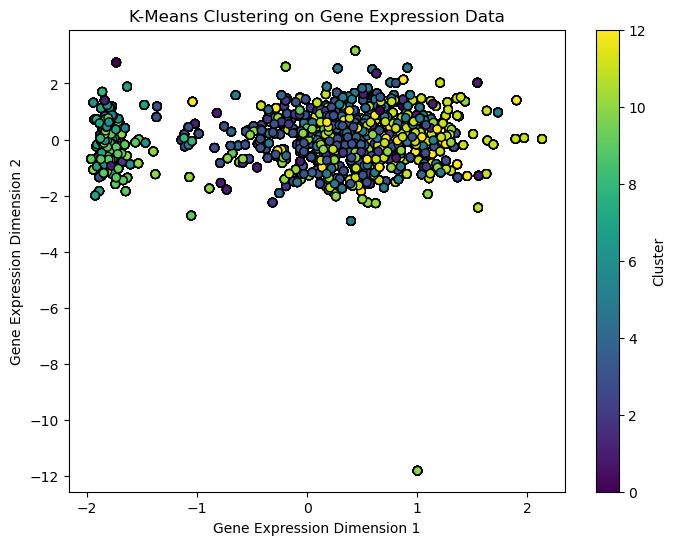

In [38]:
# Clustering for gene expression
kmeans = KMeans(n_clusters=13, random_state=42)
gene_expression_clusters = kmeans.fit_predict(gene_expressions_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(gene_expressions_scaled[:, 0], gene_expressions_scaled[:, 1], c=gene_expression_clusters, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering on Gene Expression Data")
plt.xlabel("Gene Expression Dimension 1")
plt.ylabel("Gene Expression Dimension 2")
plt.colorbar(label='Cluster')
plt.show()


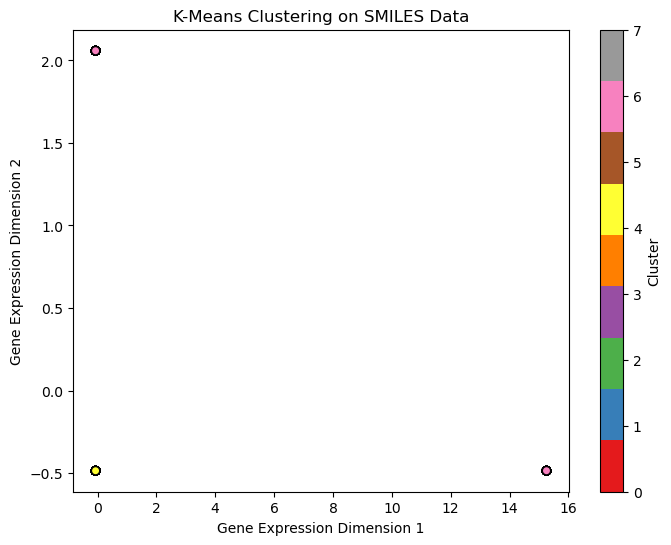

In [39]:
# Clustering for drugs (SMILES data)
kmeans = KMeans(n_clusters=8, random_state=42)
drug_clusters = kmeans.fit_predict(fingerprints_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(fingerprints_scaled[:, 0], fingerprints_scaled[:, 1], c=drug_clusters, cmap='Set1', edgecolor='k')
plt.title("K-Means Clustering on SMILES Data")
plt.xlabel("Gene Expression Dimension 1")
plt.ylabel("Gene Expression Dimension 2")
plt.colorbar(label='Cluster')
plt.show()

### 2.2.2 Hierarchical Clustering

Hierarchical clustering constructs a tree-like structure of clusters, known as a dendrogram. This method is particularly suitable for our gene expression data and drug response profiles because it doesn't require a predefined number of clusters, which allows for a more flexible analysis, and because it reveals relationships at various levels of similarity, which is valuable for understanding the complex relationship between gene expression and drug responses.

Hierarchical clustering complements K-means by offering the ability to visualize how cell lines or drugs group together at various levels of detail. It will be applied to identify groups of cell lines with similar gene expression patterns and cluster drugs based on their response profiles across cell lines, potentially uncover cancer subtypes or drug classes that weren't immediately apparent.



In [40]:
#distance_matrix = pairwise_distances(gene_expressions_scaled, metric='euclidean')
#linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Dendrogram for hierarchical clustering
#plt.figure(figsize=(10, 7))
#sch.dendrogram(linkage_matrix)
#plt.title("Hierarchical Clustering Dendrogram (Gene Expression Data)")
#plt.xlabel("Cell Lines")
#plt.ylabel("Distance")
#plt.show()

: 

: 

In [8]:
distance_matrix_drugs = pairwise_distances(fingerprints_scaled, metric='euclidean')
linkage_matrix_drugs = linkage(distance_matrix_drugs, method='ward')

# Dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix_drugs)
plt.title("Hierarchical Clustering Dendrogram (Drugs Data)")
plt.xlabel("Morgan Fingerprints")
plt.ylabel("Distance")
plt.show()

/var/folders/99/2bl8hxgn1zqd5zvpg98nwbb40000gn/T/ipykernel_65075/3746051642.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_drugs = linkage(distance_matrix_drugs, method='ward')


interpretation of results...

conclusions...

By using these two methods in combination, we gain a comprehensive understanding of the data's structure. K-means provides a clear, computationally efficient way to partition our data, while hierarchical clustering offers a more nuanced view of relationships between data points. This combination provides sufficient insights to guide the subsequent supervised modeling efforts for predicting drug responses...

# 3. Supervised learning

From all the 213 columns is not likely that all contain snificant information that help the models capture the differences between the compounds and use that knowledge to predict how sensitive a certain cell line will be to a certain drug treatment. Moreover, all the columns that do not contain relevant information for the case in study will only generate noise that will negatively afect the model's performance. In addition, the use of all 213 features to train the models can result in overfitted models due to the high-dimensionality of the data, since high dimension datasets tend to generate overcomplex models that display difficulties to capture patterns, memorizing the training data instead.

To prevent this phenomenon to occur, we decided to select only the most relevant columns by using the `Select Percentile`. First we started by checking if any column had missing values, since Select Percentile can not handle missing values.

## 1ª tentaiva com dados de expressã génica e os morgan fingerprints

In [8]:
dataset_final = dataset_filtrado.select_dtypes(include=[np.number])
dataset_final

,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan3,AvgIpc,...,fr_morpholine,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_unbrch_alkane,Y
141393,4.022593,4.022593,0.901763,10.720000,328.419,308.259,328.168797,124,2.360000,3.074113,...,0,1,0,0,0,0,0,1,0,3.019857
85325,12.255168,12.255168,-3.836107,11.500000,389.886,373.758,389.027076,130,2.750000,2.849571,...,0,0,0,0,0,0,0,0,0,5.125864
29065,12.349168,12.349168,-1.133103,15.285714,288.299,272.171,288.099774,110,2.285714,2.421384,...,0,0,2,2,0,0,0,0,0,0.636987
88450,15.237237,15.237237,-1.277429,15.630435,632.664,598.392,632.244641,240,2.304348,3.882664,...,1,0,0,0,0,0,0,1,0,-0.075099
83157,13.153903,13.153903,-0.440683,20.461538,361.490,330.242,361.247775,144,2.576923,3.055601,...,0,0,0,0,1,0,0,0,0,4.472731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107614,14.543654,14.543654,-2.468650,35.136986,1030.303,942.607,1029.602486,412,2.205479,3.371612,...,0,0,0,0,1,0,0,0,0,-4.857432
146784,12.712038,12.712038,-0.569025,15.709677,456.999,431.799,456.138675,162,2.483871,3.136391,...,0,0,0,0,0,0,0,0,0,2.550209
99504,14.945482,14.945482,-2.353438,33.689655,807.890,754.466,807.346605,314,2.103448,3.144412,...,0,0,0,0,0,0,0,0,0,-5.558880
34338,13.336637,13.336637,-2.574312,33.826087,650.762,600.362,650.330227,258,2.152174,3.302251,...,0,0,0,0,0,0,0,0,4,-5.301382


In [9]:
dataset_filtrado.shape

(25000, 148)

In [10]:
# One-hot encoding for gene expression data
gene_columns = [f'gene_{i}' for i in range(gene_expression.shape[1])]
gene_df = pd.DataFrame(gene_expression, columns=gene_columns)

In [11]:
morgan_columns = [f'morgan_{i}' for i in range(fingerprints.shape[1])]
morgan_df = pd.DataFrame(fingerprints, columns=morgan_columns)

In [12]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
tissue_encodings = one_hot_encoder.fit_transform(tissue.values.reshape(-1, 1))
tissue_columns = [f'tissue_{cat}' for cat in one_hot_encoder.categories_[0]]
tissue_df = pd.DataFrame(tissue_encodings, columns=tissue_columns)

augmented_data = pd.concat([dataset_final, morgan_df, gene_df, tissue_df], axis=1)

In [13]:
augmented_data = augmented_data.sample(n=10000, random_state=42) 

In [14]:
target_data = dataset_final['Y'].values  

print(f"Linhas no dataset augmentado (X): {augmented_data.shape[0]}, Colunas: {augmented_data.shape[1]}")
print(f"Linhas no target_data (Y): {target_data.shape[0]}")

Linhas no dataset augmentado (X): 10000, Colunas: 15552
Linhas no target_data (Y): 25000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(augmented_data.values, target_data[:10000], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [16]:
# Modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predições e métricas
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest:
MSE: 7.1242157008668014
R2 Score: -0.00513707069332936


In [17]:
# Modelo de XGBoost
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgboost.fit(X_train, y_train)

# Predições e métricas
y_pred_xgb = xgboost.predict(X_test)
print("\nXGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
MSE: 7.482964163241064
R2 Score: -0.05575195852480386


In [21]:
# Modelo de MLP
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predições e métricas
y_pred_mlp = mlp.predict(X_test)
print("\nMLP:")
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("R2 Score:", r2_score(y_test, y_pred_mlp))

ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [20]:
# Comparação dos resultados
results = {
    "Model": ["Random Forest", "XGBoost", "MLP"],
    "MSE": [
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_mlp),
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_mlp),
    ],
}

results_df = pd.DataFrame(results)
print(results_df)

NameError: name 'y_pred_mlp' is not defined